In [4]:
import numpy as np

In [5]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [6]:
grumpy =  imread('GrumpyCat.jpg').copy() # we are taking the copy to make our grumpy writable
grumpy.shape

(600, 461, 3)

## Concatenating, stacking and spliting

Let's start by combining one or more arrays together. 

Concatenating two or more arrays does not change they dimensionality, but only increases the size of the concatenated dimension.
Below we copy grumpy picture by adding more rows:

(1200, 461, 3)


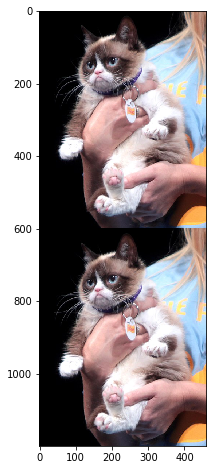

In [7]:
two_grumpies_portrait = np.concatenate((grumpy, grumpy), axis=0)
print(two_grumpies_portrait.shape)
plt.imshow(two_grumpies_portrait);

and here we add columns

(600, 922, 3)
None


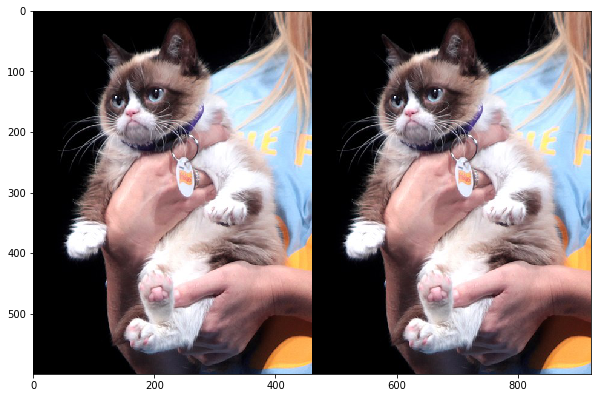

In [8]:
two_grumpies_landscape = np.concatenate((grumpy, grumpy), axis=1)
print(two_grumpies_landscape.shape)
plt.imshow(two_grumpies_landscape);
print(two_grumpies_landscape.base)

In [9]:
a = np.ones((3,2))
np.append(a,[[2,2],[3,3]], axis=0)

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [2., 2.],
       [3., 3.]])

Stacking in adds one dimension more. Below we reasemble our grumpy from separate color chanels:

In [10]:
red = grumpy[:,:,0]
green = grumpy[:,:,1]
blue  = grumpy[:,:,2]

All this chanel arrays are two-dimensional:

In [11]:
blue.shape

(600, 461)

and we will stack them creating a third dimension, which we chose to be the last:

(600, 461, 3)


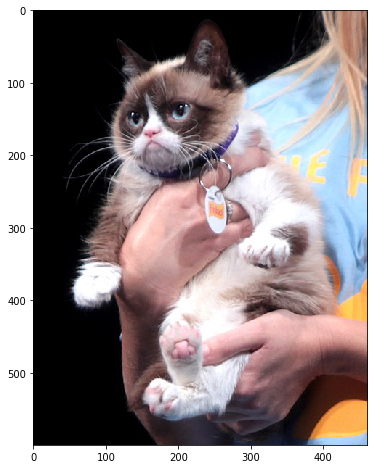

In [12]:
stacked_grumpy = np.stack((red, green, blue), axis=2)
print(stacked_grumpy.shape)
plt.imshow(stacked_grumpy);

We could sack along some other axis:

In [13]:
stacked_grumpy_wrong = np.stack((red, green, blue), axis=0)
stacked_grumpy_wrong.shape

(3, 600, 461)

But now we cannot intepret it as an image. It is a stack of chanels.

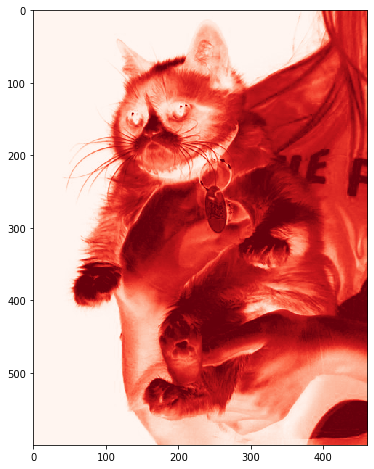

In [14]:
plt.imshow(stacked_grumpy_wrong[0], cmap='Reds');

The inverse operation to concatenating would be spliting. 

We can split an array along an axis. Below we split the picture into three color channels.  The rusult is a list of arrays. Please note however that the parts resulting from split are still three dimensional, the last dimension being "degenerate" and having size one. I will comment on this more later. We can get rid of those degenerate dimensions by using function `squeeze`.

True
<class 'list'>
(600, 461, 1)


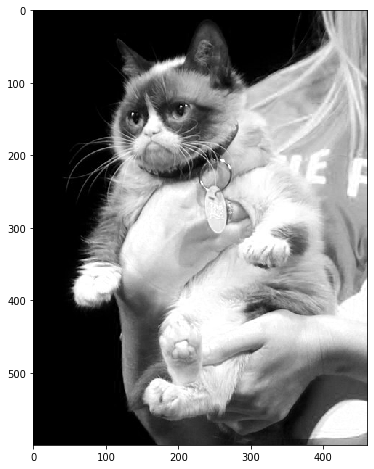

In [15]:
chanels = np.split(grumpy,3,axis=2)
print(chanels[0].base is grumpy)
print(type(chanels))
print(chanels[0].shape)
plt.imshow(np.squeeze(chanels[0]), cmap='gray');

Please try to reasamble chanels back into three color picture. Which function will you use?

But be afare that split creates the views of the array not the copies! So changing one of the resulting arrays alters the original:

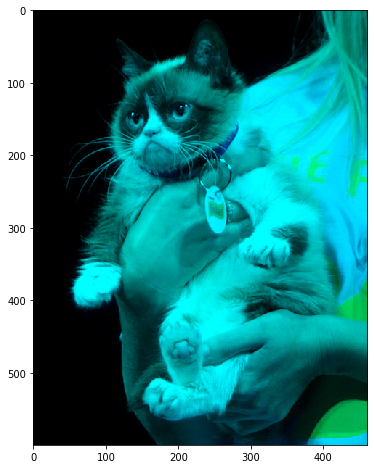

In [16]:
chanels[0][:]=0
plt.imshow(grumpy);

## Reshaping

Arrays are stored as contiguous pieces of memory. In this sense all arrays are vectors and the dimensions are just artefacts of how we view them. An array of twelve elements

In [17]:
ar = np.arange(0,12)

can be viewed as 3x4 matrix by reashaping it:

In [18]:
print(ar.shape)
ar3x4 = np.reshape(ar,(3,4))
print(ar3x4.shape)
print(ar3x4)

(12,)
(3, 4)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Reashape does not create a new array just another view into array similarly to slice. Assigning to reshaped array we are still assigning to original array:

In [19]:
ar3x4[0]=0
ar3x4[1]=1
ar3x4[2]=2
ar

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

Similarly we can view it as a 4x3 matrix:

In [20]:
ar = np.arange(0,12)

In [21]:
print(ar.shape)
ar2=np.reshape(ar,(4,3))
print(ar2.shape)
print(ar2)

(12,)
(4, 3)
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


a 2x6 matrix:

In [22]:
print(ar.shape)
ar2=np.reshape(ar,(2,6))
print(ar2.shape)
print(ar2)

(12,)
(2, 6)
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]


or higher dimensional tensor:

In [23]:
print(ar.shape)
ar2=np.reshape(ar,(2,3,2))
print(ar2.shape)
print(ar2)

(12,)
(2, 3, 2)
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]


We can let the numpy to deduce the size of one of the dimensions by marking it with -1: 

In [24]:
ar2.reshape(-1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [25]:
ar2.reshape(-1,3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [26]:
ar2.reshape(2,-1,3)

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

## Transpositions

Sometimes we need to change the order of dimensions. Let's for example take our `stacked_grumpy_wrong`

In [27]:
stacked_grumpy_wrong.shape

(3, 600, 461)

As we have already explained this cannot be interpreted as an image beacuse we expect the chanels to be the last dimension. We can fix this by using `moveaxis`

In [28]:
stacked_grumpy_right = np.moveaxis(stacked_grumpy_wrong, 0 ,2)

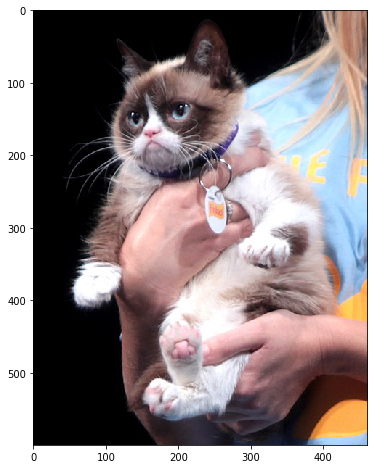

In [29]:
plt.imshow(stacked_grumpy_right);

But again what we obtain is a view not a copy and if we modify the untransposed array

In [30]:
stacked_grumpy_wrong[0,:]=0

we will also modify the transposed one:

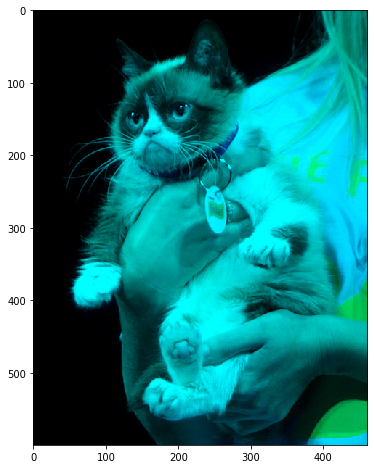

In [31]:
plt.imshow(stacked_grumpy_right);